In [1]:
import tensorflow as tf

import tensorflow_probability as tfp

import numpy as np
import matplotlib.pyplot as plt

tfd = tfp.distributions

sample shape (1000, 2)
(21,)
(20,)


TypeError: bar() missing 1 required positional argument: 'height'

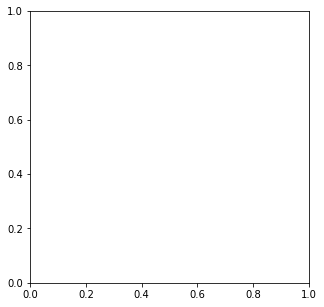

In [27]:
n_pts = 1000
n_dim = 2

mnd = tfd.Independent(tfp.distributions.MultivariateNormalDiag(
    loc=np.zeros((n_pts, n_dim)), scale_diag=None, scale_identity_multiplier=1, validate_args=False,
    allow_nan_stats=True, name='MultivariateNormalDiag'
))


x_space = np.linspace(-5, 5, n_pts)
x_space_nd = x_space.reshape(-1, 1)
for k in range(n_dim-1):
    x_space_nd = np.column_stack([x_space_nd, 0*x_space])

samples = tf.keras.backend.eval(mnd.sample())
pdf = tf.keras.backend.eval(mnd.prob(x_space_nd))
print("sample shape", samples.shape)

pdf_correction = 0
if n_dim > 1:
    pdf_correction = n_dim * np.log(2*np.pi)/np.log(10)

    
hist_, bins_ = np.histogram(samples, n_pts//50, density=True)
print(bins_.shape)
print(hist_.shape)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.bar(hist_);
ax.semilogy(x_space, pdf)
ax.semilogy(x_space, pdf+pdf_correction, ":")